In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Analyse_PayGapEurope/car_price_dataset_medium.csv')
df

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Volkswagen,2013,143440,Hybrid,Manual,First,3121,558.9,29.45,4,73873.86
996,997,Volkswagen,2021,90436,Electric,Automatic,Third,1295,437.8,10.01,6,115655.85
997,998,Kia,2015,51403,Electric,Manual,Second,4595,274.6,10.38,2,71968.08
998,999,Honda,2011,96170,Petrol,Manual,Third,2948,329.7,12.30,6,58127.19


In [3]:
df.shape

(1000, 12)

In [4]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [5]:
#Removing Duplicates
df=df.drop_duplicates()

In [6]:
#Checking for null values
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model_Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Engine_CC,0
Max_Power_bhp,0
Mileage_kmpl,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   object 
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   object 
 5   Transmission       1000 non-null   object 
 6   Owner_Type         1000 non-null   object 
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price_USD          1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Car_ID,Model_Year,Kilometers_Driven,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,2014.491000,103397.074000,2878.299000,320.939900,17.34144,4.665000,59217.249420
std,288.819436,5.710738,57417.612935,1212.337697,160.384514,7.29799,1.802783,33545.254183
min,1.000000,2005.000000,5155.000000,801.000000,40.500000,5.04000,2.000000,3028.420000
25%,250.750000,2009.750000,52188.500000,1818.250000,184.825000,10.97000,4.000000,30030.822500
50%,500.500000,2015.000000,102449.000000,2857.500000,314.650000,17.14500,5.000000,56806.745000
75%,750.250000,2019.000000,152696.500000,3959.500000,455.300000,24.03500,6.000000,87088.897500
max,1000.000000,2024.000000,199812.000000,4996.000000,599.600000,29.99000,7.000000,119611.940000


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Brand'] = le.fit_transform(df['Brand'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Owner_Type'] = le.fit_transform(df['Owner_Type'])

In [10]:
#Let's check what's happened now
df

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
0,1,0,2005,197018,0,1,0,4046,223.6,29.61,6,119611.94
1,2,1,2019,43467,2,0,0,3731,248.4,21.66,5,90842.46
2,3,5,2012,153697,2,0,2,4925,465.5,12.14,6,78432.24
3,4,6,2015,38893,3,0,1,3771,229.7,19.65,6,44568.89
4,5,0,2016,81329,2,0,0,2817,573.2,7.74,5,8751.82
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,9,2013,143440,2,1,0,3121,558.9,29.45,4,73873.86
996,997,9,2021,90436,1,0,2,1295,437.8,10.01,6,115655.85
997,998,5,2015,51403,1,1,1,4595,274.6,10.38,2,71968.08
998,999,3,2011,96170,3,1,2,2948,329.7,12.30,6,58127.19


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   int64  
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   int64  
 5   Transmission       1000 non-null   int64  
 6   Owner_Type         1000 non-null   int64  
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price_USD          1000 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 93.9 KB


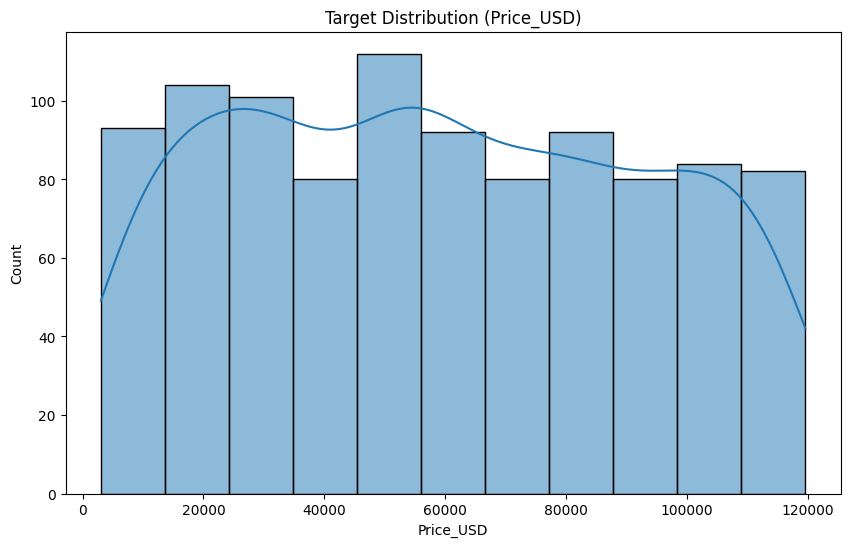

In [14]:
# Let's check the distribution of Target variable.
# Using histplot because Price_USD is numerical
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_USD'], kde=True)
plt.title('Target Distribution (Price_USD)')
plt.show()

In [16]:
# Define your threshold
price_limit = 60000

# Count values greater than the limit
expensive_cars = df[df['Price_USD'] > price_limit].shape[0]

# Count values less than the limit
cheaper_cars = df[df['Price_USD'] < price_limit].shape[0]

print(f"Cars with Price > {price_limit}: {expensive_cars}")
print(f"Cars with Price < {price_limit}: {cheaper_cars}")

Cars with Price > 60000: 477
Cars with Price < 60000: 523


In [19]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['Price_USD'].mean().plot(kind='bar', figsize=(8,5), ylabel='Average Price USD')

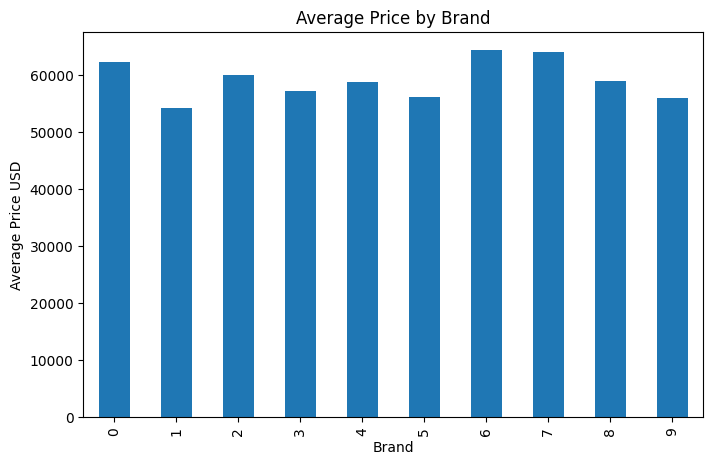

In [20]:
plot('Brand')
plt.title('Average Price by Brand')
plt.show()

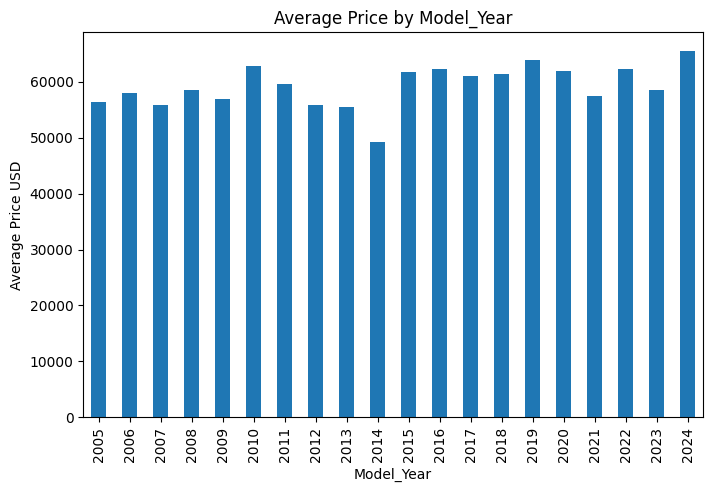

In [21]:
plot('Model_Year')
plt.title('Average Price by Model_Year')
plt.show()

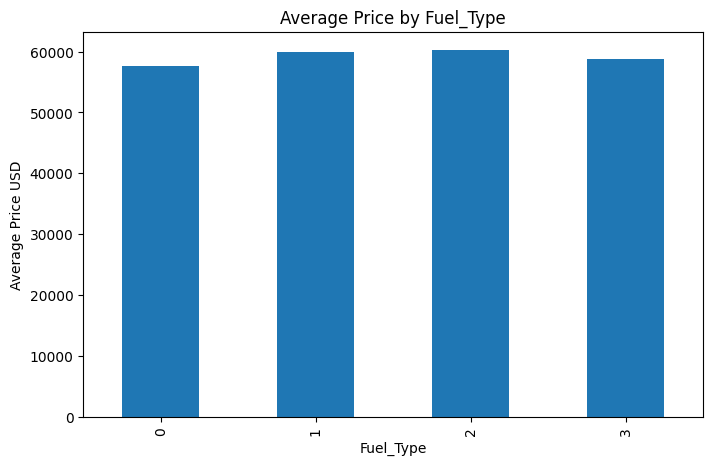

In [25]:
plot('Fuel_Type')
plt.title('Average Price by Fuel_Type')
plt.show()

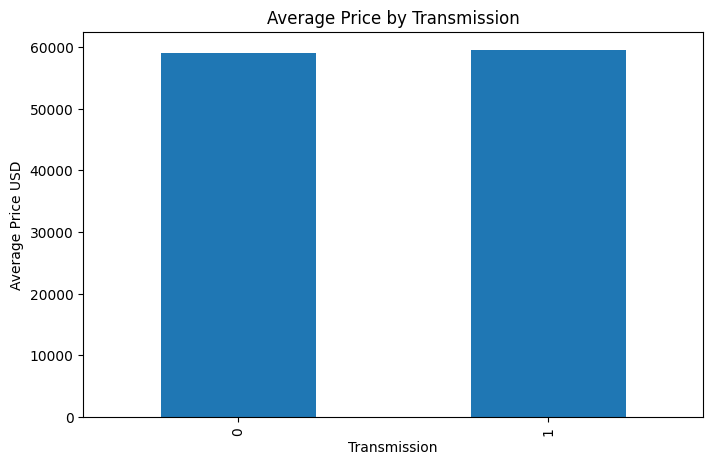

In [26]:
plot('Transmission')
plt.title('Average Price by Transmission')
plt.show()

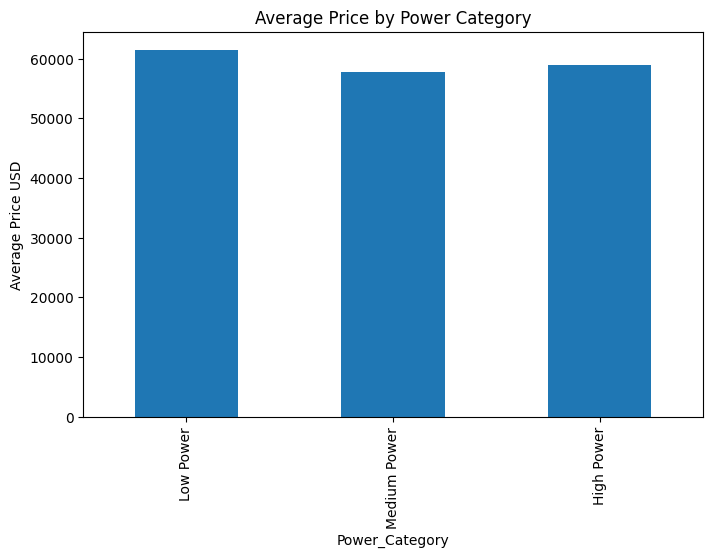

In [27]:
# We split power into 3 groups: Low (<200), Medium (200-400), High (>400)
bins = [0, 200, 400, 1000]
labels = ['Low Power', 'Medium Power', 'High Power']
df['Power_Category'] = pd.cut(df['Max_Power_bhp'], bins=bins, labels=labels)

plot('Power_Category')
plt.title('Average Price by Power Category')
plt.show()

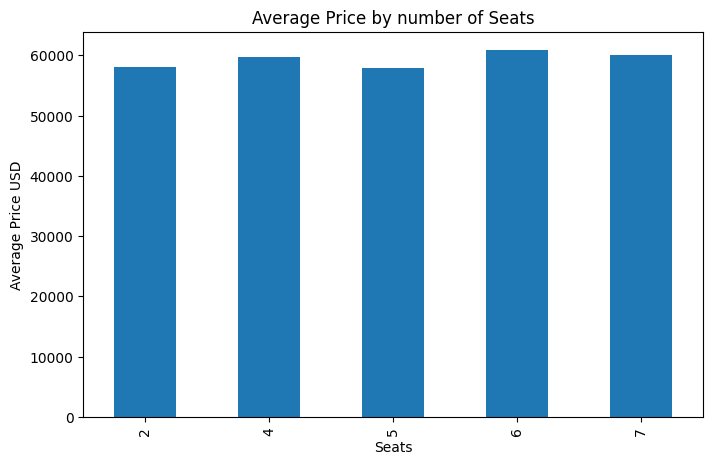

In [28]:
plot('Seats')
plt.title('Average Price by number of Seats')
plt.show()

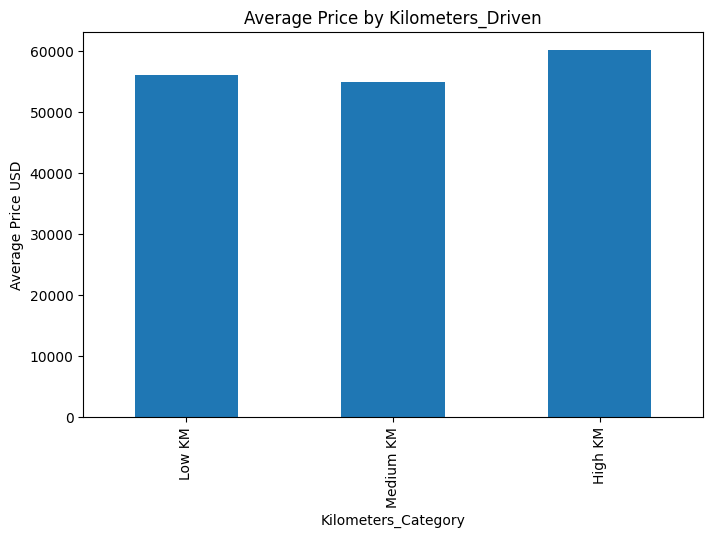

In [29]:
# We split Kilometers_Driven into 3 groups: Low (<200), Medium (200-400), High (>400)
bins = [0, 20000, 40000, 100000]
labels = ['Low KM', 'Medium KM', 'High KM']
df['Kilometers_Category'] = pd.cut(df['Kilometers_Driven'], bins=bins, labels=labels)

plot('Kilometers_Category')
plt.title('Average Price by Kilometers_Driven')
plt.show()

In [30]:
# Dropping columns with the weakest correlation to Price_USD
df_new = df.drop(columns=['Car_ID', 'Brand', 'Transmission', 'Fuel_Type'])
df_new

,Model_Year,Kilometers_Driven,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD,Power_Category,Kilometers_Category
0,2005,197018,0,4046,223.6,29.61,6,119611.94,Medium Power,NaN
1,2019,43467,0,3731,248.4,21.66,5,90842.46,Medium Power,High KM
2,2012,153697,2,4925,465.5,12.14,6,78432.24,High Power,NaN
3,2015,38893,1,3771,229.7,19.65,6,44568.89,Medium Power,Medium KM
4,2016,81329,0,2817,573.2,7.74,5,8751.82,High Power,High KM
...,...,...,...,...,...,...,...,...,...,...
995,2013,143440,0,3121,558.9,29.45,4,73873.86,High Power,NaN
996,2021,90436,2,1295,437.8,10.01,6,115655.85,High Power,High KM
997,2015,51403,1,4595,274.6,10.38,2,71968.08,Medium Power,High KM
998,2011,96170,2,2948,329.7,12.30,6,58127.19,Medium Power,High KM


In [32]:
#Finding Correlation
# Drop the categorical columns that are not suitable for direct numerical correlation calculation
df_numerical_corr = df_new.drop(columns=['Power_Category', 'Kilometers_Category'])
cn=df_numerical_corr.corr()
cn

,Model_Year,Kilometers_Driven,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
Model_Year,1.000000,-0.013288,-0.000168,-0.042583,-0.018557,0.008224,-0.032136,0.050322
Kilometers_Driven,-0.013288,1.000000,0.003786,0.034086,0.047227,0.017475,-0.026729,0.047646
Owner_Type,-0.000168,0.003786,1.000000,-0.010537,-0.022390,-0.010252,0.027796,-0.089636
Engine_CC,-0.042583,0.034086,-0.010537,1.000000,0.064301,0.014738,-0.019744,-0.014171
Max_Power_bhp,-0.018557,0.047227,-0.022390,0.064301,1.000000,0.040226,-0.009126,-0.017241
Mileage_kmpl,0.008224,0.017475,-0.010252,0.014738,0.040226,1.000000,0.040155,0.075588
Seats,-0.032136,-0.026729,0.027796,-0.019744,-0.009126,0.040155,1.000000,0.022289
Price_USD,0.050322,0.047646,-0.089636,-0.014171,-0.017241,0.075588,0.022289,1.000000


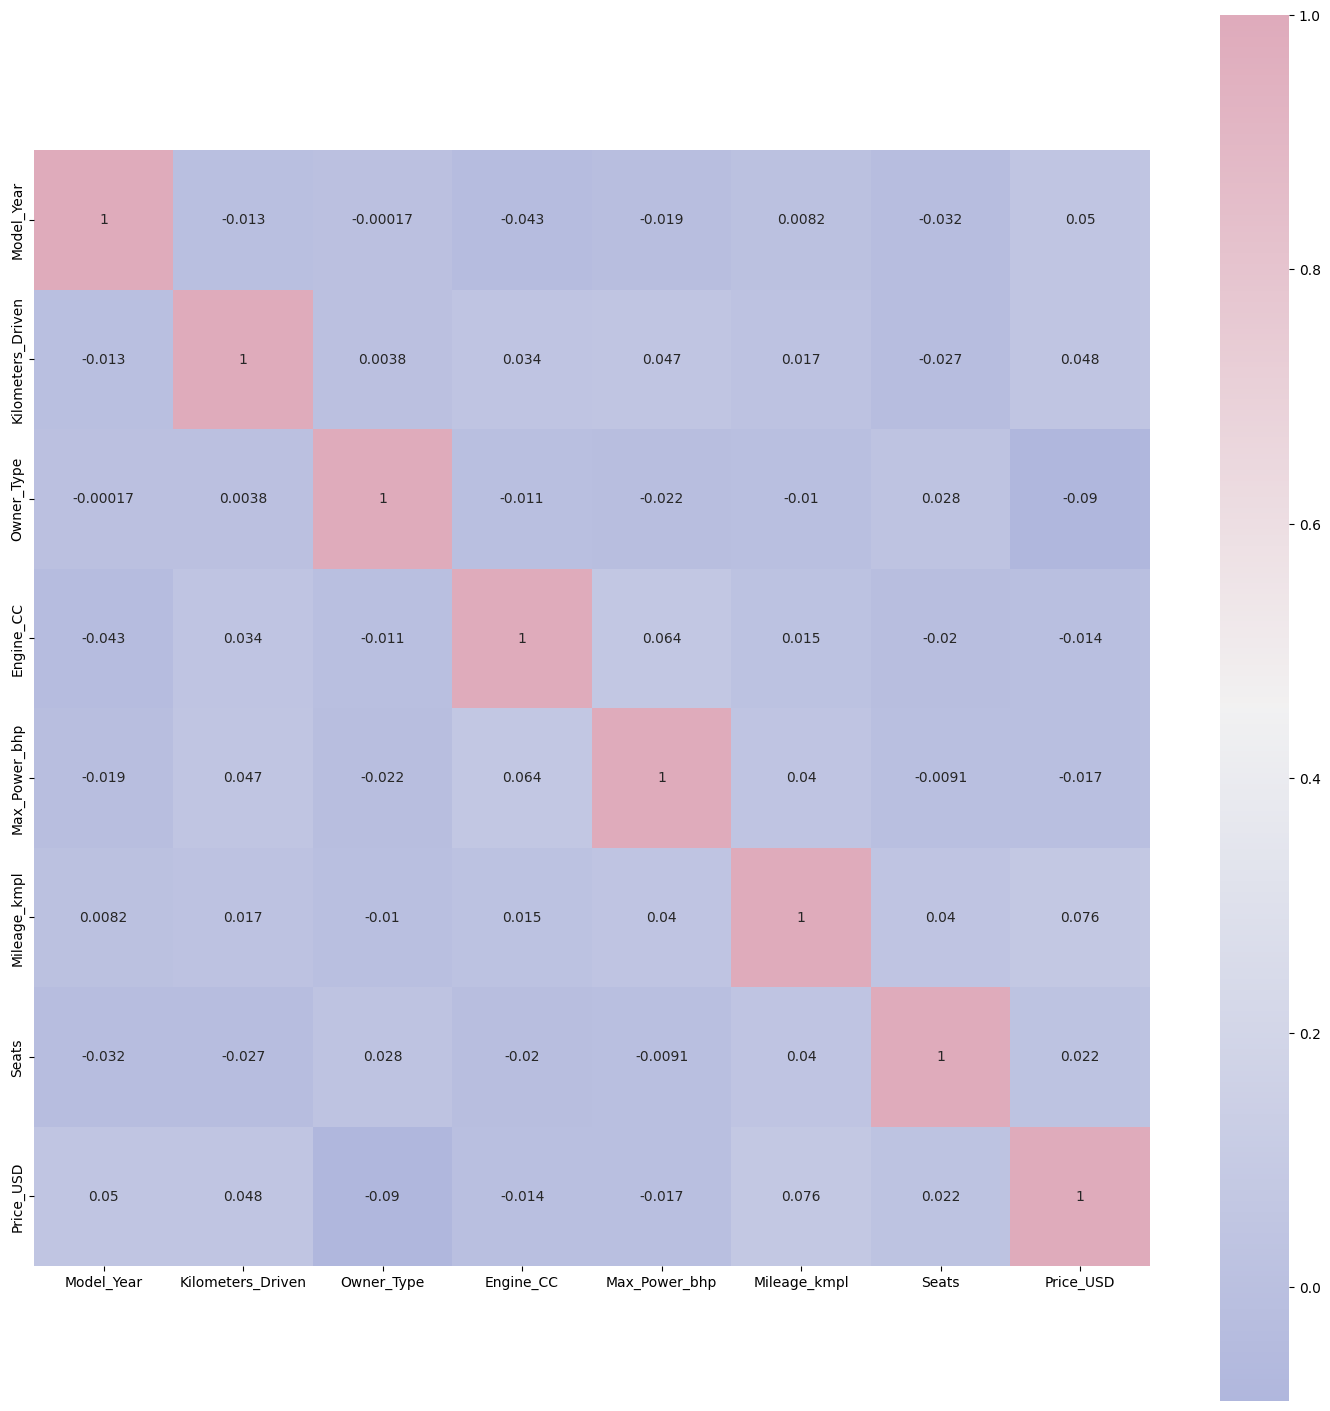

In [33]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

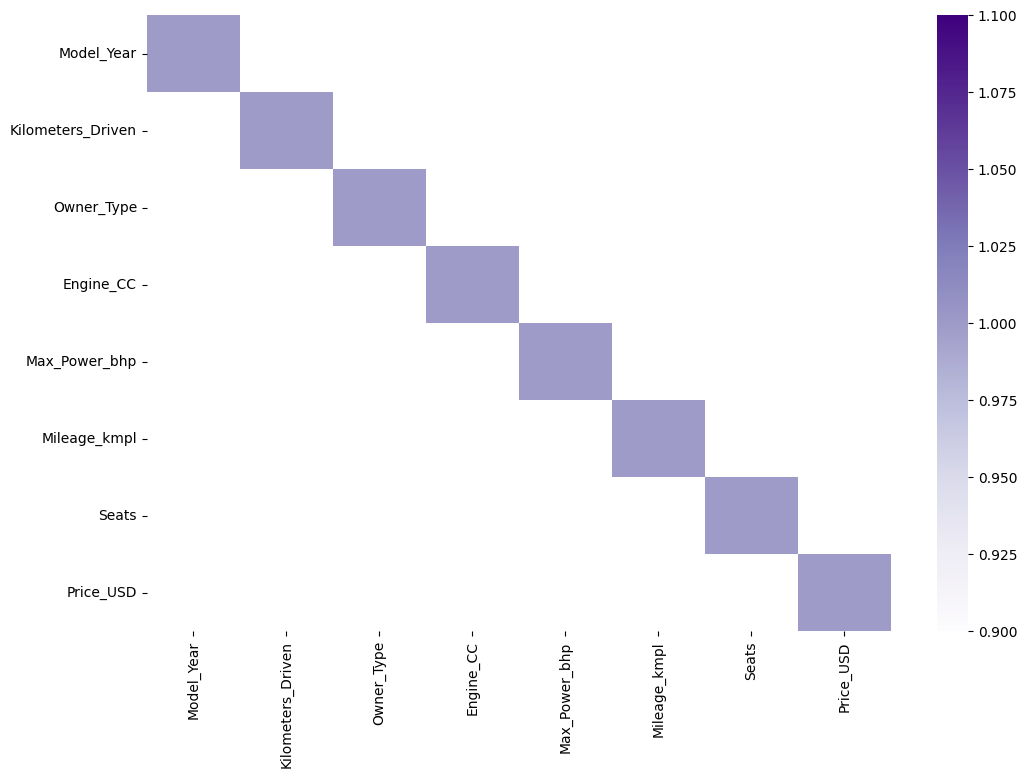

In [36]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Purples")

In [37]:
df_new['Mileage_Year_Interaction'] = df_new['Mileage_kmpl'] * df_new['Model_Year']
df_new

,Model_Year,Kilometers_Driven,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD,Power_Category,Kilometers_Category,Mileage_Year_Interaction
0,2005,197018,0,4046,223.6,29.61,6,119611.94,Medium Power,NaN,59368.05
1,2019,43467,0,3731,248.4,21.66,5,90842.46,Medium Power,High KM,43731.54
2,2012,153697,2,4925,465.5,12.14,6,78432.24,High Power,NaN,24425.68
3,2015,38893,1,3771,229.7,19.65,6,44568.89,Medium Power,Medium KM,39594.75
4,2016,81329,0,2817,573.2,7.74,5,8751.82,High Power,High KM,15603.84
...,...,...,...,...,...,...,...,...,...,...,...
995,2013,143440,0,3121,558.9,29.45,4,73873.86,High Power,NaN,59282.85
996,2021,90436,2,1295,437.8,10.01,6,115655.85,High Power,High KM,20230.21
997,2015,51403,1,4595,274.6,10.38,2,71968.08,Medium Power,High KM,20915.70
998,2011,96170,2,2948,329.7,12.30,6,58127.19,Medium Power,High KM,24735.30


In [38]:
# Splitting independent (X) and dependent (y) variables
X = df_new.drop('Price_USD', axis=1)
y = df_new['Price_USD']

In [40]:
# ADASYN is for classification tasks to handle imbalanced classes.
# Since 'Price_USD' is a continuous target variable for a regression problem, ADASYN is not applicable.
# If you were performing a classification task (e.g., classifying cars as 'cheap', 'medium', 'expensive'),
# you would first need to convert 'Price_USD' into discrete categories before using ADASYN.

In [41]:
len(X)

1000

In [42]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [48]:
# One-hot encode the categorical columns 'Power_Category' and 'Kilometers_Category'
X_train_encoded = pd.get_dummies(X_train, columns=['Power_Category', 'Kilometers_Category'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Power_Category', 'Kilometers_Category'], drop_first=True)

# Ensure all columns are aligned between training and testing sets after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# For regression problems, use a regression model, not LogisticRegression
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

# Fit the regression model with the numerically encoded data
regression_model.fit(X_train_encoded, y_train)

LinearRegression()

In [50]:
#Predicting result using testing data with the preprocessed test set
y_lr_pred= regression_model.predict(X_test_encoded)
y_lr_pred

array([57896.02705031, 55816.67197013, 54006.47039206, 67096.34804171,
       62322.8219232 , 53539.19747926, 65913.11338384, 60702.3077633 ,
       60360.71827455, 58095.16612882, 50855.67748725, 55019.2683548 ,
       58171.55527536, 57236.45856486, 57561.7882399 , 53341.94718576,
       56911.84173925, 63012.92624116, 59476.44686909, 63882.53999764,
       48929.06977306, 60405.07795054, 63275.69706992, 60246.18889503,
       61192.44737218, 60108.4241496 , 50918.72168278, 53882.12842121,
       65998.50113008, 55075.50797454, 57993.91860414, 57601.12464351,
       63014.40382305, 58903.04790552, 65574.15970859, 59866.07300623,
       54632.50766164, 59819.56468733, 69554.61181298, 68559.75425393,
       65925.85984368, 62733.26202911, 64859.2159144 , 53687.8260863 ,
       64263.81770953, 70790.13515942, 61635.61702387, 59328.305704  ,
       67195.05945768, 62317.33129514, 71285.18345557, 53184.97632476,
       47110.28777471, 57176.16281529, 53531.93905089, 65055.09067275,
      

In [52]:
# Model accuracy - using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_lr_pred)
mse = mean_squared_error(y_test, y_lr_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_lr_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 29220.46
Mean Squared Error (MSE): 1120935728.09
Root Mean Squared Error (RMSE): 33480.38
R-squared (R2): -0.00


In [54]:
# One-hot encode the categorical columns 'Power_Category' and 'Kilometers_Category'
X_train_encoded_dt = pd.get_dummies(X_train, columns=['Power_Category', 'Kilometers_Category'], drop_first=True)
X_test_encoded_dt = pd.get_dummies(X_test, columns=['Power_Category', 'Kilometers_Category'], drop_first=True)

# Ensure all columns are aligned between training and testing sets after encoding
X_train_encoded_dt, X_test_encoded_dt = X_train_encoded_dt.align(X_test_encoded_dt, join='left', axis=1, fill_value=0)

# Use DecisionTreeRegressor for regression problems
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)

# Fit the regression model with the numerically encoded data
dt_model.fit(X_train_encoded_dt, y_train)

DecisionTreeRegressor(random_state=0)

In [56]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test_encoded_dt)
y_dt_pred

array([  8751.82,  65877.78,  94939.59,  49107.79,  24202.51, 106456.69,
        93385.14,  34634.84,  85722.65,  18247.9 ,  93244.81,  96760.47,
        87176.82,   3625.83,  40042.48,  70532.37,  90091.08,  73712.54,
        80836.92,  70087.99,  77534.56,  36881.18,  28884.82,  66512.44,
        97313.32,  11468.04, 116846.31,  51031.17, 112240.43,  50511.61,
        15785.7 ,  16490.23,  97650.4 , 114260.14,  68007.21,  83350.42,
        80497.51,  58780.2 ,  85925.58,  30612.93,  94853.41,  55472.77,
         6606.48,  77997.71,  69511.25,  54659.48,  35628.02,   3048.  ,
        60991.51,  13246.22,  62266.35,   9115.43,  21519.49,  45493.13,
        63631.54,  63715.67,  45715.99, 115645.82,  17071.7 ,   4248.4 ,
        66336.24, 115645.82,  23090.07,  60799.37,  98574.72,  32234.49,
         5109.75,  24059.96,  73001.81,  66459.23,  77963.1 , 101187.33,
       103464.63,  67875.23,   4412.18,  95214.7 ,  24206.28,  26813.66,
        59868.73, 116927.88, 112033.79,   4081.27, 

In [58]:
# Model accuracy - using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_dt_pred)
mse = mean_squared_error(y_test, y_dt_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_dt_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 39823.25
Mean Squared Error (MSE): 2443510060.66
Root Mean Squared Error (RMSE): 49431.87
R-squared (R2): -1.19


In [60]:
#Fitting K-NN regressor to the training set
from sklearn.neighbors import KNeighborsRegressor
# Use X_train_encoded_dt (or X_train_encoded) which has categorical columns one-hot encoded
knn_model= KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_encoded_dt, y_train)

KNeighborsRegressor()

In [62]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test_encoded_dt)
y_knn_pred

array([49878.726, 49739.168, 54016.078, 60101.682, 43236.776, 67779.294,
       73530.17 , 73253.564, 48329.848, 83175.712, 63829.218, 27654.776,
       65638.828, 62297.352, 54186.922, 53135.236, 52575.058, 80194.086,
       87562.36 , 48674.334, 62730.454, 74952.65 , 36829.124, 57522.902,
       46983.444, 46176.416, 43406.86 , 58757.82 , 76666.912, 63099.756,
       91207.328, 27511.512, 60810.42 , 51837.436, 40821.158, 69163.794,
       55913.688, 40751.558, 52279.964, 57343.278, 75542.62 , 33432.75 ,
       76997.834, 39937.796, 77937.506, 68296.438, 39710.694, 45236.29 ,
       73615.876, 48656.794, 81245.44 , 44657.466, 55750.572, 71055.448,
       61095.604, 69193.702, 28320.626, 74993.204, 83232.286, 52189.934,
       31081.604, 67026.798, 69459.33 , 48700.204, 75193.566, 57274.712,
       70451.266, 48315.782, 73253.564, 58346.638, 53214.602, 81976.868,
       77937.506, 44061.458, 45681.96 , 88959.136, 43914.45 , 75851.592,
       63843.57 , 68182.62 , 59130.362, 86173.884, 

In [64]:
# Model accuracy - using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_knn_pred)
mse = mean_squared_error(y_test, y_knn_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_knn_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 31188.12
Mean Squared Error (MSE): 1307621918.34
Root Mean Squared Error (RMSE): 36161.06
R-squared (R2): -0.17


In [71]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# One-hot encode the categorical columns for cross-validation
X_cv_encoded = pd.get_dummies(X, columns=['Power_Category', 'Kilometers_Category'], drop_first=True)

# Linear Regression model
lr_scores = cross_val_score(LinearRegression(), X_cv_encoded, y, cv=kf, scoring='r2')

# Decision tree model
dt_scores = cross_val_score(DecisionTreeRegressor(random_state=0), X_cv_encoded, y, cv=kf, scoring='r2')

# KNN model
knn_scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_cv_encoded, y, cv=kf, scoring='r2')

print("Linear Regression models' average R2 score:", np.mean(lr_scores))
print("Decision tree models' average R2 score:", np.mean(dt_scores))
print("KNN models' average R2 score:", np.mean(knn_scores))

Linear Regression models' average R2 score: 0.00045774274940120946
Decision tree models' average R2 score: -0.9607223171710536
KNN models' average R2 score: -0.19301903940389198
